total training pig images: 30
total training giraffe images: 30
total training moose images: 30
total validation pig images: 10
total validation giraffe images: 10
total validation moose images: 10
--
Total training images: 90
Total validation images: 30
Found 90 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


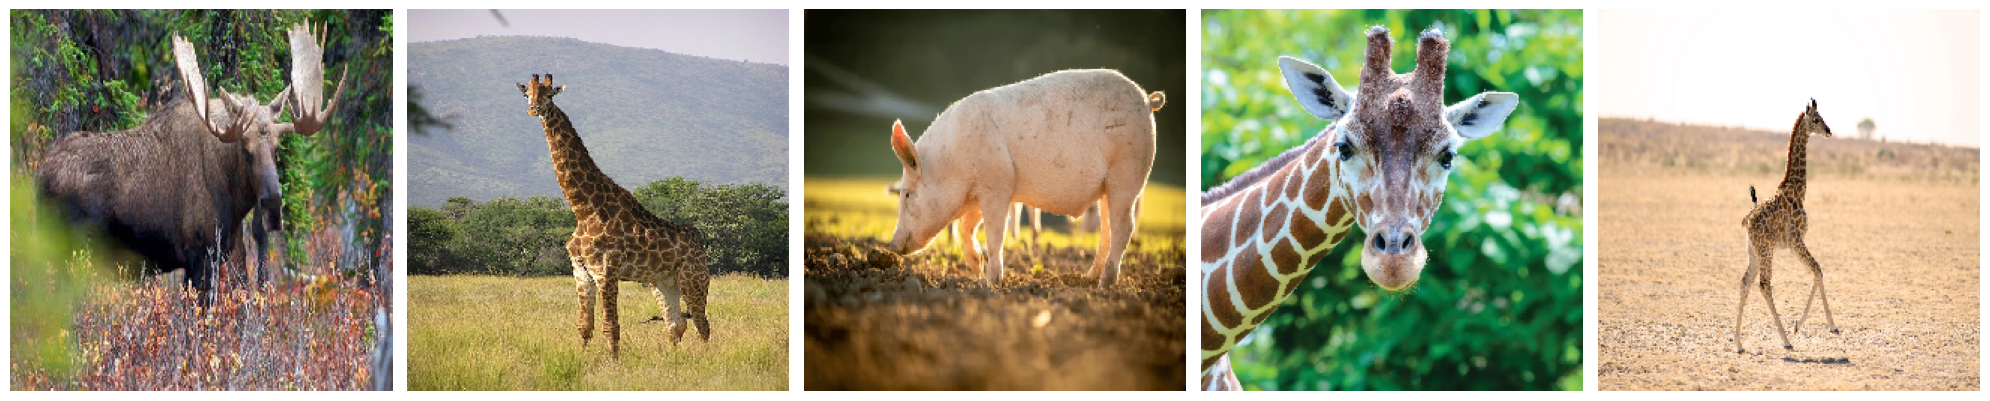

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 255, 255, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 16)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 63, 63, 64)       

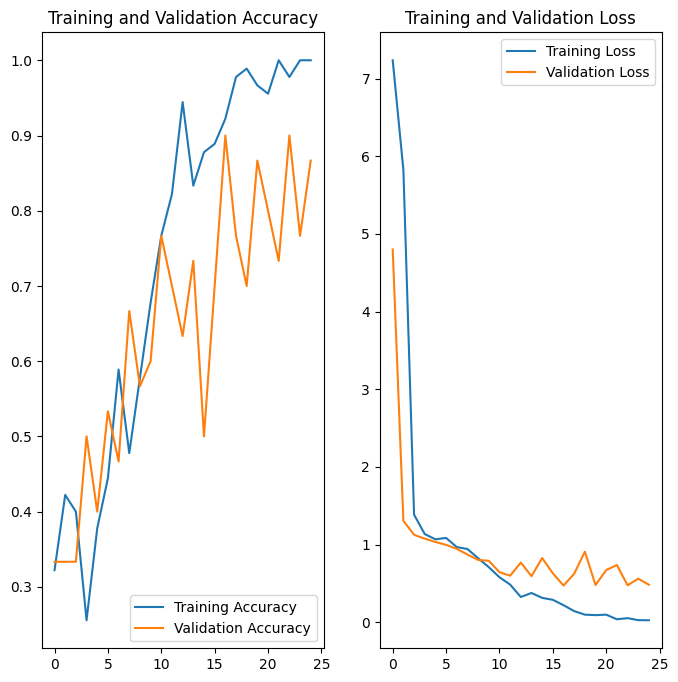

In [27]:
# Importing the packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Path to your local zip file
database = './Experiment1'

# Extract the contents of the zip file
#extracted_folder_path = './Experiment1'
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
 #   zip_ref.extractall(extracted_folder_path)

# Assigning variable names for the training and validation set
train_dir = os.path.join(database, 'train')
validation_dir = os.path.join(database, 'validation')

# Directory with training pig pictures
train_pig_dir = os.path.join(train_dir, 'pig')
# Directory with training giraffe pictures
train_giraffe_dir = os.path.join(train_dir, 'giraffe')
# Directory with training moose pictures
train_moose_dir = os.path.join(train_dir, 'moose')

# Directory with validation pig pictures
validation_pig_dir = os.path.join(validation_dir, 'pig')
# Directory with validation giraffe pictures
validation_giraffe_dir = os.path.join(validation_dir, 'giraffe')
# Directory with validation moose pictures
validation_moose_dir = os.path.join(validation_dir, 'moose')

# Understanding the data
num_pig_tr = len(os.listdir(train_pig_dir))
num_giraffe_tr = len(os.listdir(train_giraffe_dir))
num_moose_tr = len(os.listdir(train_moose_dir))
num_pig_val = len(os.listdir(validation_pig_dir))
num_giraffe_val = len(os.listdir(validation_giraffe_dir))
num_moose_val = len(os.listdir(validation_moose_dir))

# Total number of training and validation images
total_train = num_pig_tr + num_giraffe_tr + num_moose_tr
total_val = num_pig_val + num_giraffe_val + num_moose_val

print('total training pig images:', num_pig_tr)
print('total training giraffe images:', num_giraffe_tr)
print('total training moose images:', num_moose_tr)
print('total validation pig images:', num_pig_val)
print('total validation giraffe images:', num_giraffe_val)
print('total validation moose images:', num_moose_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

# Setting variables for preprocessing and training the network
tr_batch_size = 30
val_batch_size = 10
epochs = 25
IMG_HEIGHT = 255
IMG_WIDTH = 255

# Prepping the data
# Generator for our training data
train_image_generator = ImageDataGenerator(rescale=1./255)
# Generator for our validation data
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=tr_batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',  # Use categorical for more than two classes
    classes=['pig', 'giraffe', 'moose']  # Specify class labels
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=val_batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical',
    classes=['pig', 'giraffe', 'moose']
)

#Visualizing the training images
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])


#Creating the model
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')  # Change 1 to 3 for multi-class classification
])

#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Training the model - this takes quite a bit of time
history = model.fit(
    train_data_gen,
    steps_per_epoch=max(1, total_train // tr_batch_size),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=max(1, total_val // val_batch_size)
)

#Visualizing the training results
def plot_training_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()



# Visualizing the new model
plot_training_results(history)

# #Applying Horizontal flip
# image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
# train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(IMG_HEIGHT, IMG_WIDTH))
# #Printing the results
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

# #Randomly rotating the images
# image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
# train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(IMG_HEIGHT, IMG_WIDTH))
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

# #Applying Zoom Augmentation
# # zoom_range from 0 - 1 where 1 = 100%.
# image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) #
# train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(IMG_HEIGHT, IMG_WIDTH))
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

# image_gen_train = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=45,
#     width_shift_range=.15,
#     height_shift_range=.15,
#     horizontal_flip=True,
#     zoom_range=0.5,
#     fill_mode='nearest',  # Add this line
# )
# train_data_gen = image_gen_train.flow_from_directory(
#     batch_size=batch_size,
#     directory=train_dir,
#     shuffle=True,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='categorical',  # Change to categorical
#     classes=['pig', 'giraffe', 'moose']
# )

# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

# #Creating the validation generator
# image_gen_val = ImageDataGenerator(rescale=1./255)
# val_data_gen = image_gen_val.flow_from_directory(
#     batch_size=batch_size,
#     directory=validation_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='categorical',
#     classes=['pig', 'giraffe', 'moose']
# )

# #Applying Dropout
# model_new = Sequential([
#    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#    MaxPooling2D(),
#    Dropout(0.2),
#    Conv2D(16, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Conv2D(16, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Dropout(0.2),
#    Flatten(),
#    Dense(512, activation='relu'),
#    Dense(3, activation='softmax')  # Change 1 to 3 for multi-class classification
# ])


# #Compiling the new model
# model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model_new.summary()

# #Training the model
# history = model_new.fit_generator(train_data_gen,steps_per_epoch=max(1, total_train // batch_size),epochs=epochs,validation_data=val_data_gen, validation_steps=max(1, total_val // batch_size))

# #Visualizing the new model
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs_range = range(epochs)
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')
# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

# Function to preprocess the input image
def preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Normalize the image
    img_array = img_array / 255.0

    return img_array

# Function to calculate final metrics
def calculate_final_metrics(history, final_epoch):
    return {
        'final_loss': history.history['loss'][final_epoch],
        'final_accuracy': history.history['accuracy'][final_epoch],
        'final_val_loss': history.history['val_loss'][final_epoch],
        'final_val_accuracy': history.history['val_accuracy'][final_epoch]
    }

# Function to make predictions
def predict_animal(model, img_path, class_labels=["pig", "giraffe", "moose"]):
    processed_img = preprocess_image(img_path)
    predictions = model.predict(processed_img)

    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class = class_labels[predicted_class_index]

    # Get metrics at the final epoch
    final_epoch = epochs - 1

    # Evaluating the model
    val_data_gen.reset()  # Reset the validation generator to the beginning
    y_true = val_data_gen.classes
    y_pred = model.predict(val_data_gen)

    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate additional metrics
    loss = history.history['loss'][final_epoch]
    accuracy = history.history['accuracy'][final_epoch]
    val_loss = history.history['val_loss'][final_epoch]
    val_accuracy = history.history['val_accuracy'][final_epoch]

    # Calculate precision, recall, and f1-score
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')

    # Return data as separate values
    return predicted_class, loss, accuracy, val_loss, val_accuracy, precision, recall, f1, confusion_matrix(y_true, y_pred_classes).tolist()

In [26]:
test_image_path ="./test-img/37.jpg"
prediction = predict_animal(model, test_image_path)
print(f"The model predicts: {prediction}")

3/3 [==============================] - 0s 128ms/step
The model predicts: ('moose', 0.001566569204442203, 1.0, 1.1433870792388916, 0.800000011920929, {'final_loss': 0.001566569204442203, 'final_accuracy': 1.0, 'final_val_loss': 1.1433870792388916, 'final_val_accuracy': 0.800000011920929}, 0.3952380952380953, 0.4, 0.3865795206971678, [[2, 2, 6], [3, 4, 3], [2, 2, 6]])
